In [15]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Load CIFAR-10 dataset

In [16]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Preprocess the data

In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [18]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Split data into training and validation sets

In [19]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Build a simple CNN model

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

In [21]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

In [22]:
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

In [23]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Custom learning rate for Adam optimizer

In [24]:
custom_optimizer = Adam(learning_rate=0.001)

Compile the model

In [25]:
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Define callbacks - Checkpoint and ReduceLROnPlateau

In [26]:
checkpoint_path = 'best_weights.keras'
checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)
lr_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

Data augmentation

In [27]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train)

Train the model

In [28]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32,
                    epochs=35,  # Increase the number of epochs
                    validation_data=(x_val, y_val),  # Use validation data
                    callbacks=[checkpoint, lr_plateau])

Epoch 1/35
1250/1250 [==============================] - ETA: 0s - loss: 1.7761 - accuracy: 0.3806
Epoch 1: val_loss improved from inf to 2.16161, saving model to best_weights.keras
1250/1250 [==============================] - 77s 59ms/step - loss: 1.7761 - accuracy: 0.3806 - val_loss: 2.1616 - val_accuracy: 0.3601 - lr: 0.0010
Epoch 2/35
1250/1250 [==============================] - ETA: 0s - loss: 1.2992 - accuracy: 0.5333
Epoch 2: val_loss improved from 2.16161 to 1.26578, saving model to best_weights.keras
1250/1250 [==============================] - 70s 56ms/step - loss: 1.2992 - accuracy: 0.5333 - val_loss: 1.2658 - val_accuracy: 0.5461 - lr: 0.0010
Epoch 3/35
1249/1250 [============================>.] - ETA: 0s - loss: 1.1217 - accuracy: 0.6049
Epoch 3: val_loss improved from 1.26578 to 1.13891, saving model to best_weights.keras
1250/1250 [==============================] - 70s 56ms/step - loss: 1.1217 - accuracy: 0.6050 - val_loss: 1.1389 - val_accuracy: 0.6160 - lr: 0.0010
Epoch

Save the trained model

In [29]:
model.save('cifar10_model.keras')  # Save the model in Keras format

Evaluate the model on the test set

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 5s 16ms/step - loss: 0.4343 - accuracy: 0.8560
Test Accuracy: 85.60%


Allow the user to upload an image and input the class name

Prompt the user to input the class name

In [31]:
user_input_class = input('Please enter the class name for the uploaded image: ')

Load and preprocess the uploaded image

In [32]:
uploaded_file_path = 'download.jpeg'  # Replace with the actual path
uploaded_image = tf.image.resize(load_img(uploaded_file_path), (32, 32)) / 255.0
input_image = np.reshape(img_to_array(uploaded_image), (1, 32, 32, 3))

Use the trained model to predict the class of the uploaded image

In [33]:
predictions = model.predict(input_image)

1/1 [==============================] - 0s 328ms/step


Get the predicted class index

In [34]:
predicted_class_index = np.argmax(predictions[0])

Get the predicted class name

In [35]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Display the result

In [36]:
predicted_class_name = class_names[predicted_class_index]
print(f'This image is most likely a {predicted_class_name} according to the model.')
print(f'User provided class name: {user_input_class}')

This image is most likely a airplane according to the model.
User provided class name: airplane


Check if the user-provided class name matches the predicted class

In [37]:
if user_input_class.lower() == predicted_class_name.lower():
    print('User-provided class name matches the model prediction!')
else:
    print('User-provided class name does not match the model prediction.')

User-provided class name matches the model prediction!


Display some images from CIFAR-10

In [38]:
def display_cifar_images(images, labels, class_names):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

Display CIFAR-10 images

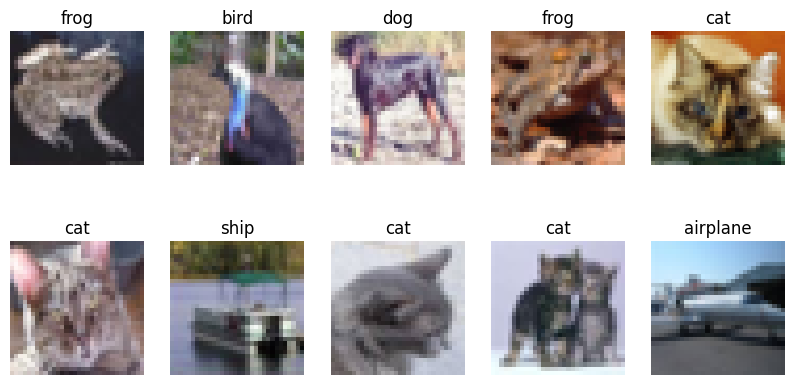

In [39]:
display_cifar_images(x_train, y_train, class_names)

Allow the user to upload an image and input the class name<br>
... (previous code)

Display user-uploaded image

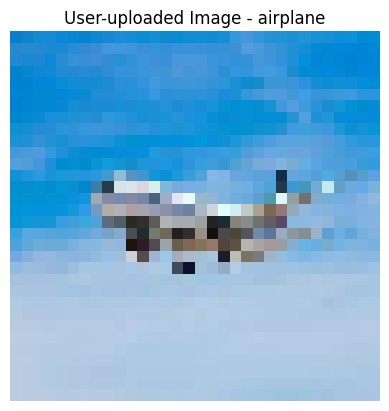

In [40]:
plt.imshow(uploaded_image)
plt.title(f'User-uploaded Image - {user_input_class}')
plt.axis('off')
plt.show()